#Loading Data


In [ ]:
!python --version
import matplotlib.pyplot as plt
import pandas as pd

: 

#EDA

In [2]:

# Read in chunks of 100,000 rows at a time
# chunk_size = 100000
data = pd.read_csv('data/NGAFID_imputed_data.csv')

# Iterate through chunks
# for chunk in chunks:
#     print(chunk.head())  # Process each chunk
#     break



In [34]:
data.head()

,volt1,volt2,amp1,amp2,FQtyL,FQtyR,E1 FFlow,E1 OilT,E1 OilP,E1 RPM,...,OAT,IAS,VSpd,NormAc,AltMSL,id,plane_id,split,date_diff,before_after
0,28.1,28.1,6.4,0.4,20.22,23.84,2.54,74.25,67.50,1229.0,...,-2.2,0.0,13.21,-0.03,838.000000,0,37,0,1,0
1,28.1,28.1,6.4,0.4,20.22,23.84,2.54,74.25,67.50,1229.0,...,-2.2,0.0,13.21,-0.03,838.000000,0,37,0,1,0
2,28.1,28.1,6.4,0.5,20.27,23.84,2.47,74.25,67.44,1226.0,...,-2.2,0.0,11.15,-0.03,839.000000,0,37,0,1,0
3,28.1,28.1,6.3,0.4,20.22,23.89,2.40,74.25,67.44,1228.0,...,-2.2,0.0,0.65,0.02,2652.722323,0,37,0,1,0
4,28.1,28.1,6.2,0.4,20.22,23.84,2.38,74.25,67.50,1230.0,...,-2.5,0.0,-22.52,-0.02,841.000000,0,37,0,1,0


In [31]:
print("Dimension of the entire dataset: ", data.shape)  # entire dataset
print(type(data))



Dimension of the entire dataset:  (28783265, 28)
<class 'pandas.core.frame.DataFrame'>


In [35]:
data.columns

Index(['volt1', 'volt2', 'amp1', 'amp2', 'FQtyL', 'FQtyR', 'E1 FFlow',
       'E1 OilT', 'E1 OilP', 'E1 RPM', 'E1 CHT1', 'E1 CHT2', 'E1 CHT3',
       'E1 CHT4', 'E1 EGT1', 'E1 EGT2', 'E1 EGT3', 'E1 EGT4', 'OAT', 'IAS',
       'VSpd', 'NormAc', 'AltMSL', 'id', 'plane_id', 'split', 'date_diff',
       'before_after'],
      dtype='object')

In [33]:

sorted(data['id'].unique()).__len__()


5089

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28783265 entries, 0 to 28783264
Data columns (total 28 columns):
 #   Column        Dtype  
---  ------        -----  
 0   volt1         float64
 1   volt2         float64
 2   amp1          float64
 3   amp2          float64
 4   FQtyL         float64
 5   FQtyR         float64
 6   E1 FFlow      float64
 7   E1 OilT       float64
 8   E1 OilP       float64
 9   E1 RPM        float64
 10  E1 CHT1       float64
 11  E1 CHT2       float64
 12  E1 CHT3       float64
 13  E1 CHT4       float64
 14  E1 EGT1       float64
 15  E1 EGT2       float64
 16  E1 EGT3       float64
 17  E1 EGT4       float64
 18  OAT           float64
 19  IAS           float64
 20  VSpd          float64
 21  NormAc        float64
 22  AltMSL        float64
 23  id            int64  
 24  plane_id      int64  
 25  split         int64  
 26  date_diff     int64  
 27  before_after  int64  
dtypes: float64(23), int64(5)
memory usage: 6.0 GB


In [37]:
print("Labels (before_after): ",data['before_after'].unique())

Labels (before_after):  [0 1]


In [38]:
data.describe()

,volt1,volt2,amp1,amp2,FQtyL,FQtyR,E1 FFlow,E1 OilT,E1 OilP,E1 RPM,...,OAT,IAS,VSpd,NormAc,AltMSL,id,plane_id,split,date_diff,before_after
count,2.878326e+07,2.878326e+07,2.878326e+07,2.878326e+07,2.878326e+07,2.878326e+07,2.878326e+07,2.878326e+07,2.878326e+07,2.878326e+07,...,2.878326e+07,2.878326e+07,2.878326e+07,2.878326e+07,2.878326e+07,2.878326e+07,2.878326e+07,2.878326e+07,2.878326e+07,2.878326e+07
mean,2.799673e+01,2.794451e+01,8.199462e-01,1.321562e-02,1.965085e+01,2.177676e+01,7.008522e+00,1.466112e+02,6.623711e+01,1.938471e+03,...,6.478406e+00,7.209912e+01,-8.968407e-02,5.008501e-03,2.652722e+03,6.409151e+03,3.604774e+01,1.869411e+00,6.277220e-02,4.405312e-01
std,5.737082e-01,5.181473e-01,2.481596e+00,1.424849e-01,6.785306e+00,6.315003e+00,4.103760e+00,2.476718e+01,9.450063e+00,6.498661e+02,...,1.240908e+01,4.339066e+01,3.872043e+02,7.229636e-02,1.793905e+03,3.743435e+03,2.058653e+01,1.386318e+00,1.412281e+00,4.964509e-01
min,0.000000e+00,2.000000e+00,-1.008000e+02,-4.500000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-4.070000e+00,0.000000e+00,...,-5.720000e+01,-1.610000e+00,-1.408000e+04,-1.360000e+00,-1.734000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-2.000000e+00,0.000000e+00
25%,2.800000e+01,2.800000e+01,3.000000e-01,0.000000e+00,1.593000e+01,1.878000e+01,2.650000e+00,1.376000e+02,6.128000e+01,1.268000e+03,...,-1.800000e+00,4.480000e+01,-1.336000e+02,-2.000000e-02,9.105000e+02,3.162000e+03,1.800000e+01,1.000000e+00,-1.000000e+00,0.000000e+00
50%,2.810000e+01,2.810000e+01,8.000000e-01,0.000000e+00,1.858000e+01,2.139000e+01,7.620000e+00,1.501000e+02,6.860000e+01,2.268000e+03,...,7.800000e+00,8.830000e+01,-9.100000e-01,0.000000e+00,2.246000e+03,6.326000e+03,3.600000e+01,2.000000e+00,1.000000e+00,0.000000e+00
75%,2.820000e+01,2.810000e+01,1.500000e+00,1.000000e-01,2.161000e+01,2.362000e+01,9.440000e+00,1.634000e+02,7.170000e+01,2.460000e+03,...,1.600000e+01,1.043000e+02,9.194000e+01,2.000000e-02,3.694000e+03,9.714000e+03,5.300000e+01,3.000000e+00,1.000000e+00,1.000000e+00
max,2.950000e+01,2.930000e+01,8.590000e+01,3.600000e+00,5.400000e+01,5.400000e+01,1.180600e+02,2.342000e+02,1.622000e+02,2.896000e+03,...,4.300000e+01,1.939000e+02,6.810000e+03,2.840000e+00,1.205000e+04,1.290000e+04,7.700000e+01,4.000000e+00,2.000000e+00,1.000000e+00


In [39]:
# get the integer columns
int_cols = data.select_dtypes(include=['int64']).columns

# get the float columns
float_cols = data.select_dtypes(include=['float64']).columns

print("Integer columns: ", int_cols)
print("Float columns: ", float_cols)

Integer columns:  Index(['id', 'plane_id', 'split', 'date_diff', 'before_after'], dtype='object')
Float columns:  Index(['volt1', 'volt2', 'amp1', 'amp2', 'FQtyL', 'FQtyR', 'E1 FFlow',
       'E1 OilT', 'E1 OilP', 'E1 RPM', 'E1 CHT1', 'E1 CHT2', 'E1 CHT3',
       'E1 CHT4', 'E1 EGT1', 'E1 EGT2', 'E1 EGT3', 'E1 EGT4', 'OAT', 'IAS',
       'VSpd', 'NormAc', 'AltMSL'],
      dtype='object')


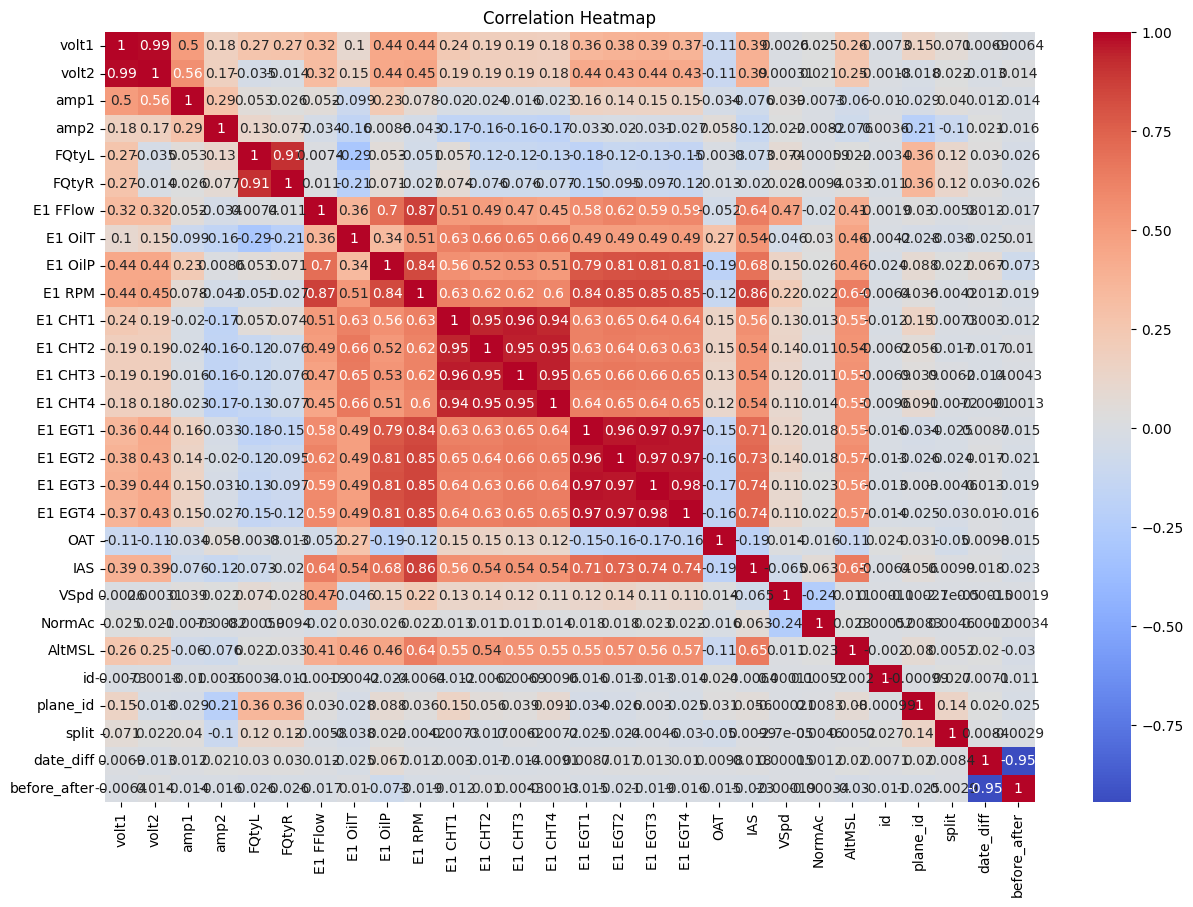

In [11]:
# --- 2. Correlation Heatmap ---
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = data[data.columns].corr()

# Set the figure size
plt.figure(figsize=(15, 10))

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [16]:

# --- 4. Autocorrelation and Partial Autocorrelation Plots ---
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data['IAS'], lags=50)
plt.title("Autocorrelation Function of IAS")
plt.show()

plot_pacf(data['IAS'], lags=50)
plt.title("Partial Autocorrelation Function of IAS")
plt.show()

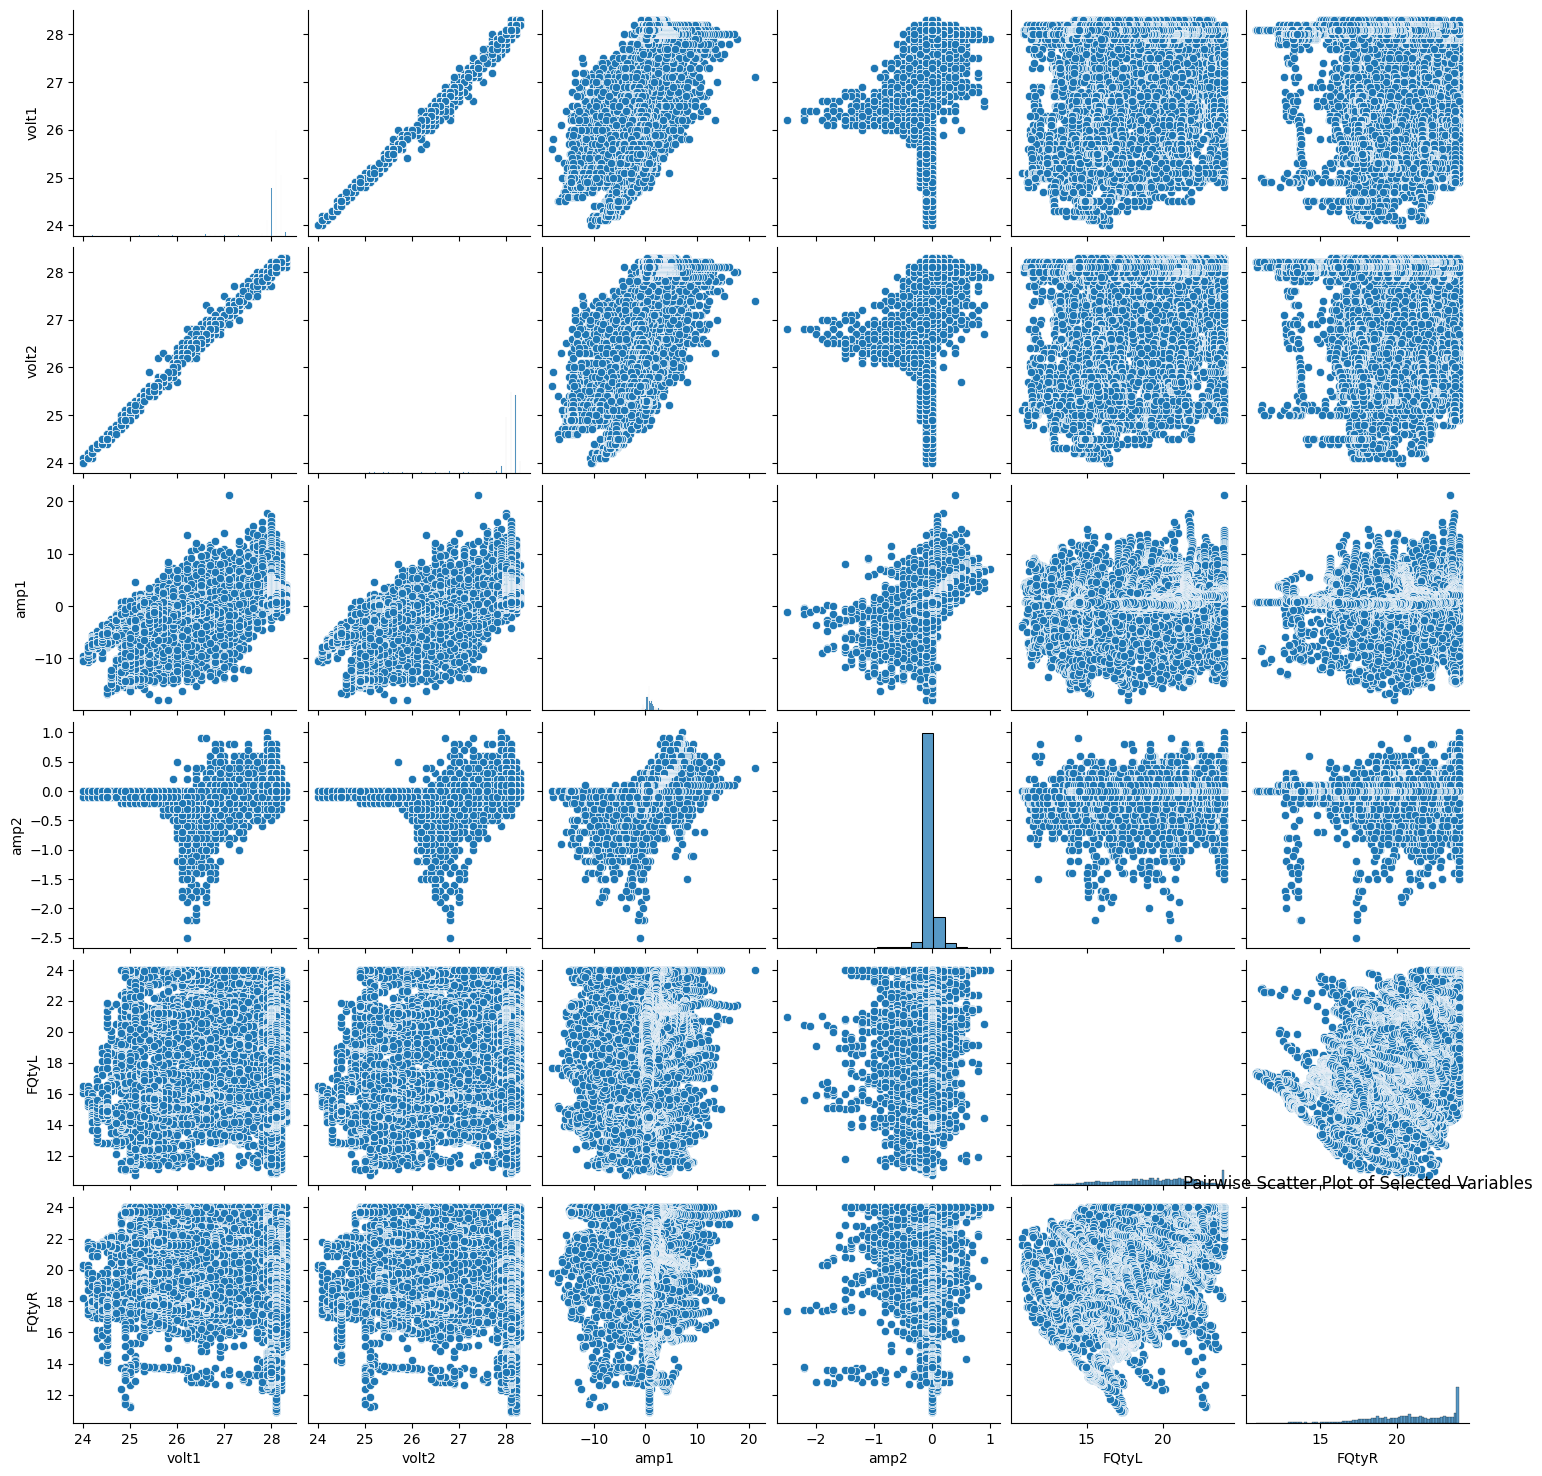

In [ ]:
# --- 5. Pairwise Scatter Plot (Pairplot) ---
sns.pairplot(chunk[columns_to_plot])
plt.title("Pairwise Scatter Plot of Selected Variables")
plt.show()

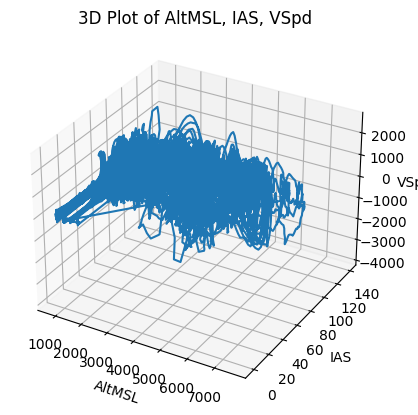

In [ ]:
# --- 6. 3D Scatter Plot ---
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(chunk['AltMSL'], chunk['IAS'], chunk['VSpd'])
ax.set_xlabel('AltMSL')
ax.set_ylabel('IAS')
ax.set_zlabel('VSpd')
plt.title("3D Plot of AltMSL, IAS, VSpd")
plt.show()

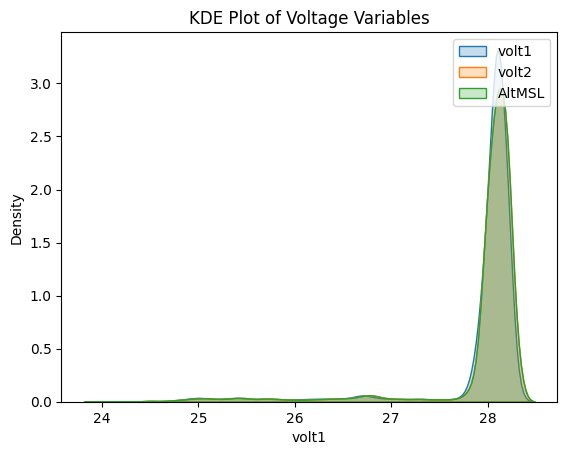

In [ ]:
# --- 7. KDE Plot (Kernel Density Estimation) ---
sns.kdeplot(data['volt1'], fill=True, label='volt1')
sns.kdeplot(data['volt2'], fill=True, label='volt2')
sns.kdeplot(data['AltMSL'], fill=True, label='AltMSL')
plt.legend()
plt.title("KDE Plot of Voltage Variables")
plt.show()


## Data Preprocessing

In [4]:
import matplotlib.pyplot as plt

# See the distribution of NaNs across the columns
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values = missing_values.sort_values(ascending=False)

if not missing_values.empty:
    missing_values.plot(kind='bar')
    plt.title("Number of Missing Values per Column")
    plt.show()
else:
    print("No missing values found in the dataset.")

No missing values found in the dataset.


In [ ]:
#use the knn imputer to fill in the missing values
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
data_imputed = imputer.fit_transform(data)
data_imputed = pd.DataFrame(data_imputed, columns=data.columns)


In [ ]:
#use iterative imputer to fill in the missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0)
data_imputed = imputer.fit_transform(data)
data_imputed = pd.DataFrame(data_imputed, columns=data.columns)

In [1]:

from sklearn.impute import SimpleImputer

# Load the data
data = pd.read_csv('/Users/manasdubey2022/Desktop/NGAFID/Codebase/data/NGAFID_MC_C28.csv')

# Perform data imputation
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
 # save to csv
data_imputed.to_csv('NGAFID_imputed_data.csv', index=False)

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
'''
Here we are going to split the data into training, validation, and testing sets for time series data.
This is done by splitting the data into 70% training, 15% validation, and 15% testing sets.
Scaling is performed on the training set and then applied to the validation and testing sets.
The scaled datasets are saved into separate files.


'''

# Load the dataset
data_imputed = pd.read_csv('NGAFID_imputed_data.csv')

# Separate the 'before_after' column (target) from the other features
before_after = data_imputed['before_after']
features = data_imputed.drop(columns=['before_after'])

# Determine split points for training (70%), validation (15%), and testing (15%)
train_size = int(0.7 * len(features))
val_size = int(0.15 * len(features))

# First 70% for training, next 15% for validation, and last 15% for testing
X_train = features[:train_size]
y_train = before_after[:train_size]

X_val = features[train_size:train_size + val_size]
y_val = before_after[train_size:train_size + val_size]

X_test = features[train_size + val_size:]
y_test = before_after[train_size + val_size:]

# Perform feature-wise scaling on the training features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test features using the same scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled features back to DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=X_val.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Add the 'before_after' column back to the scaled DataFrames
train_data_scaled = pd.concat([X_train_scaled_df, y_train.reset_index(drop=True)], axis=1)
val_data_scaled = pd.concat([X_val_scaled_df, y_val.reset_index(drop=True)], axis=1)
test_data_scaled = pd.concat([X_test_scaled_df, y_test.reset_index(drop=True)], axis=1)

# Save the scaled training, validation, and testing sets into separate files
train_data_scaled.to_csv('data/NGAFID_train_data.csv', index=False)
val_data_scaled.to_csv('data/NGAFID_val_data.csv', index=False)
test_data_scaled.to_csv('data/NGAFID_test_data.csv', index=False)

print("Training, validation, and testing sets have been saved.")


Training, validation, and testing sets have been saved.


In [ ]:
# see the before_after column in train, val and test data
import pandas as pd
train_data_scaled = pd.read_csv('data/NGAFID_train_data.csv')
val_data_scaled = pd.read_csv('data/NGAFID_val_data.csv')
test_data_scaled = pd.read_csv('data/NGAFID_test_data.csv')
print(train_data_scaled['before_after'].value_counts())
print(val_data_scaled['before_after'].value_counts())
print(test_data_scaled['before_after'].value_counts())

: 

ARIMA

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# Fit ARIMA model
model = ARIMA(data['value'], order=(5, 1, 0))
model_fit = model.fit(disp=0)

# Forecast
forecast = model_fit.forecast(steps=10)[0]

# Plot forecast
plt.figure(figsize=(10, 6))
plt.plot(data['timestamp'], data['value'], label='Original')
plt.plot(pd.date_range(start=data['timestamp'].iloc[-1], periods=10, freq='D'), forecast, label='Forecast')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

# TSAI

In [1]:

#|export
from tsai.imports import *
import sklearn
from sklearn.linear_model import RidgeClassifierCV, RidgeCV
from sklearn.metrics import make_scorer
from tsai.data.external import *
from tsai.models.layers import *
warnings.filterwarnings("ignore", category=FutureWarning)
from utils.ChunkedCSVLoader import ChunkedCSVDataset


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Users/manasdubey2022/anaconda3/envs/ngafid_env/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/manasdubey2022/anaconda3/envs/ngafid_env/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/Users/manasdubey2022/anaconda3/envs/ngafid_env/lib/python3.9/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/manasdubey2022/anaconda3/envs/ngafid_env/lib/python3.9/site-pa

In [2]:
class ROCKET(nn.Module):
    '''RandOm Convolutional KErnel Transform

    ROCKET is a GPU Pytorch implementation of the ROCKET functions generate_kernels
    and apply_kernels that can be used  with univariate and multivariate time series.
    '''

    def __init__(self, c_in, seq_len, n_kernels=10_000, kss=[7, 9, 11], device=None, verbose=False):

        '''
        Input: is a 3d torch tensor of type torch.float32. When used with univariate TS,
        make sure you transform the 2d to 3d by adding unsqueeze(1).
        c_in: number of channels or features. For univariate c_in is 1.
        seq_len: sequence length
        '''
        super().__init__()
        device = ifnone(device, default_device())
        kss = [ks for ks in kss if ks < seq_len]
        convs = nn.ModuleList()
        for i in range(n_kernels):
            ks = np.random.choice(kss)
            dilation = 2**np.random.uniform(0, np.log2((seq_len - 1) // (ks - 1)))
            padding = int((ks - 1) * dilation // 2) if np.random.randint(2) == 1 else 0
            weight = torch.randn(1, c_in, ks)
            weight -= weight.mean()
            bias = 2 * (torch.rand(1) - .5)
            layer = nn.Conv1d(c_in, 1, ks, padding=2 * padding, dilation=int(dilation), bias=True)
            layer.weight = torch.nn.Parameter(weight, requires_grad=False)
            layer.bias = torch.nn.Parameter(bias, requires_grad=False)
            convs.append(layer)
        self.convs = convs
        self.n_kernels = n_kernels
        self.kss = kss
        self.to(device=device)
        self.verbose=verbose

    def forward(self, x):
        _output = []
        for i in progress_bar(range(self.n_kernels), display=self.verbose, leave=False):
            out = self.convs[i](x).cpu()
            _max = out.max(dim=-1)[0]
            _ppv = torch.gt(out, 0).sum(dim=-1).float() / out.shape[-1]
            _output.append(_max)
            _output.append(_ppv)
        return torch.cat(_output, dim=1)
     

In [3]:
def create_rocket_features(dl, model, verbose=False):
    """Args:
        model     : ROCKET model instance
        dl        : single TSDataLoader (for example dls.train or dls.valid)
    """
    _x_out = []
    _y_out = []
    for i,(xb,yb) in enumerate(progress_bar(dl, display=verbose, leave=False)):
        _x_out.append(model(xb).cpu())
        _y_out.append(yb.cpu())
    return torch.cat(_x_out).numpy(), torch.cat(_y_out).numpy()

get_rocket_features = create_rocket_features

In [5]:
chunk_size = 100000


def add_channel_dimension(num_channels):
    def transform(X):
        X = torch.tensor(X, dtype=torch.float32)
        return X.unsqueeze(0) if num_channels == 1 else X.view(num_channels, -1)
    return transform
#apply a transform to my ChunkedCSVDataset such that instead of fetching a row as (tensor(27 dimensional), tensor(1 dimensional)), it fetches a row as (tensor(27 dimensional),t tensor(27 dimensional))

train_dataset = ChunkedCSVDataset('data/NGAFID_train_data.csv', 'before_after', chunk_size=chunk_size, transform=add_channel_dimension(1))
val_dataset = ChunkedCSVDataset('data/NGAFID_val_data.csv', 'before_after', chunk_size=chunk_size)
test_dataset = ChunkedCSVDataset('data/NGAFID_test_data.csv', 'before_after', chunk_size=chunk_size)

In [30]:
import torch

# Simulate a batch of 4 samples (each with 27 features)
sample_batch = [
    (torch.randn(27), torch.tensor(1)),  # Sample 1 (features and label)
    (torch.randn(27), torch.tensor(0)),  # Sample 2
    (torch.randn(27), torch.tensor(1)),  # Sample 3
    (torch.randn(27), torch.tensor(0))   # Sample 4
]

# Test your collate function
num_channels = 1  # Assuming univariate time series

# Call the collate function manually
X_batch, y_batch = rocket_collate_fn(sample_batch, num_channels)

# Print the results
print("X_batch shape:", X_batch.shape)  # Expected: [4, 1, 27]
print("y_batch shape:", y_batch.shape)  # Expected: [4]

# Check the types and contents
print("Type of X_batch:", type(X_batch))
print("Type of y_batch:", type(y_batch))

print("X_batch:", X_batch)
print("y_batch:", y_batch)


X_batch shape: torch.Size([4, 1, 27])
y_batch shape: torch.Size([4])
Type of X_batch: <class 'torch.Tensor'>
Type of y_batch: <class 'torch.Tensor'>
X_batch: tensor([[[ 0.4722,  0.8204, -1.7460, -1.7584, -0.3376,  1.4720,  1.4608,
           0.6093, -0.2512,  0.6726, -0.5071, -0.0482,  0.7322,  1.2741,
           0.5023, -0.3839, -0.5978,  1.8648, -0.5401, -1.1985,  0.1893,
           0.0407,  0.7399,  0.6510, -0.5774, -0.7629, -0.5667]],

        [[ 0.0764, -0.3634, -1.8687,  0.1236,  0.7730,  0.3642, -1.0040,
           0.0936, -0.0558, -0.0063,  0.1490, -1.3830,  0.1379, -2.0398,
           0.8696,  1.0938,  1.5914,  0.9488,  0.3149,  0.8911, -0.0481,
          -1.0032,  0.7416, -1.5548, -0.4208, -1.1928, -0.3323]],

        [[-1.3723, -0.9752, -1.4709, -0.6349, -0.5451,  0.2698,  0.0337,
           1.0318,  0.2381, -0.3574,  1.5606,  1.3789,  1.7167, -0.3889,
          -0.4220, -0.0055,  0.4290,  0.6701,  0.1835, -0.5070, -0.9805,
           1.5747, -0.8930, -0.9911,  0.4716,  0.61

In [7]:
# Initialize the ROCKET model
c_in = 1  # Number of input channels (features)
seq_len = 27  # Sequence length
n_kernels = 1000  # Number of kernels for testing with CPU
kss = [7, 9, 11]  # Kernel sizes

rocket_model = ROCKET(c_in, seq_len, n_kernels=n_kernels, kss=kss, device='cpu', verbose=True)

In [39]:
# Extract features using the ROCKET model
features = rocket_model(X_train.unsqueeze(1))  # Add channel dimension

In [40]:
print("ROCKET features shape:", features.shape)

ROCKET features shape: torch.Size([512, 2000])


In [16]:
convolutions = rocket_model.convs
print(convolutions[0].weight)

Parameter containing:
tensor([[[-0.2124,  0.8237, -0.2153, -0.1322, -1.1864,  0.0366,  1.2684,
          -1.1477,  0.2212,  0.0023,  0.5417]]])


# Anomaly detection


## Load data

0.000000000000000000e+00.2
0.0    45955
1.0     3438
Name: count, dtype: int64


(array([45955.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  3438.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 artists>)

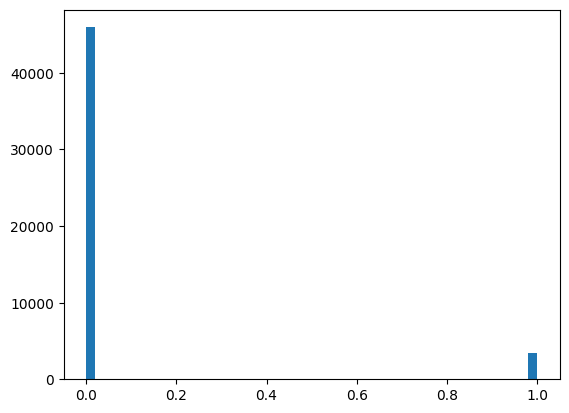

In [4]:
# check the label distribution of the X_train_features_rocket_1000.csv
import pandas as pd
import matplotlib.pyplot as plt
features = pd.read_csv('data/rocket_features/X_train_features_rocket_1000.csv')
print(features.iloc[:, -1].value_counts())

#plot histogram of the last column
plt.hist(features.iloc[:, -1], bins=50)

0.000000000000000000e+00.1
0.0    43794
1.0     3438
Name: count, dtype: int64


(array([43794.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  3438.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 artists>)

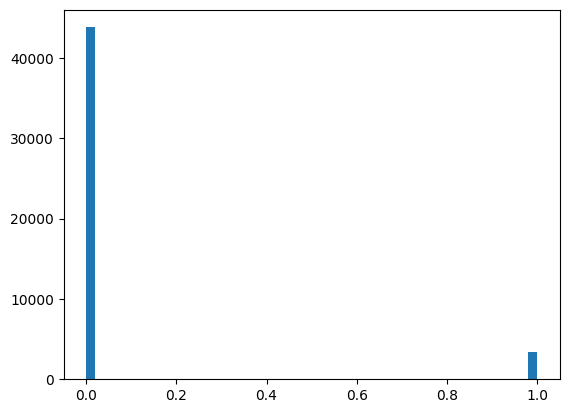

In [5]:
features = pd.read_csv('data/rocket_features/X_train_features_rocket_800.csv')

print(features.iloc[:, -1].value_counts())

#plot histogram of the last column
plt.hist(features.iloc[:, -1], bins=50)

before_after
0    16103339
1    12679926
Name: count, dtype: int64


(array([16103339.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0.,        0.,        0.,        0.,
               0., 12679926.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 

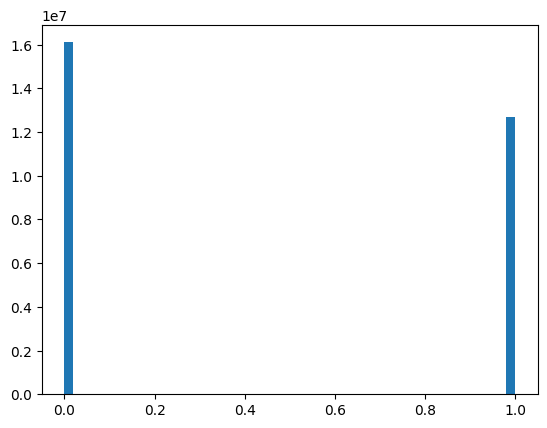

In [6]:
# full file label distribution
features = pd.read_csv('data/NGAFID_MC_C28.csv')
print(features['before_after'].value_counts())

#plot histogram of the last column
plt.hist(features['before_after'], bins=50)


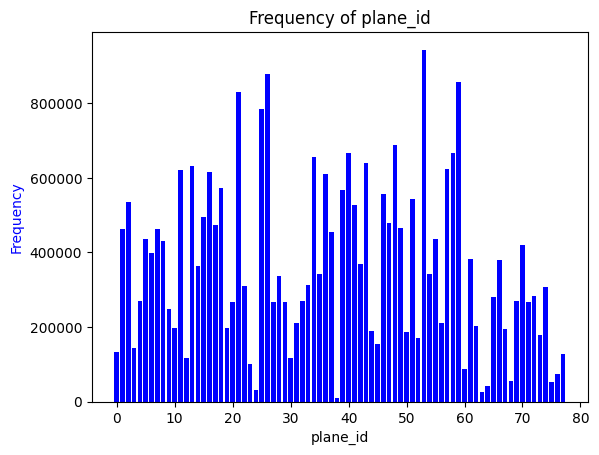

Number of plane_id's:  78


In [18]:
import numpy as np

# Extract the 'plane_id' column
plane_id = features['plane_id']

# Count the frequency of each plane_id
plane_id_counts = plane_id.value_counts()



# Plot bar chart with actual frequencies
fig, ax1 = plt.subplots()

ax1.bar(plane_id_counts.index, plane_id_counts, color='b')
ax1.set_xlabel('plane_id')
ax1.set_ylabel('Frequency', color='b')

plt.title("Frequency of plane_id")
plt.show()

# Print the unique values of the plane_id column
print("Number of plane_id's: ", features['plane_id'].unique().__len__())


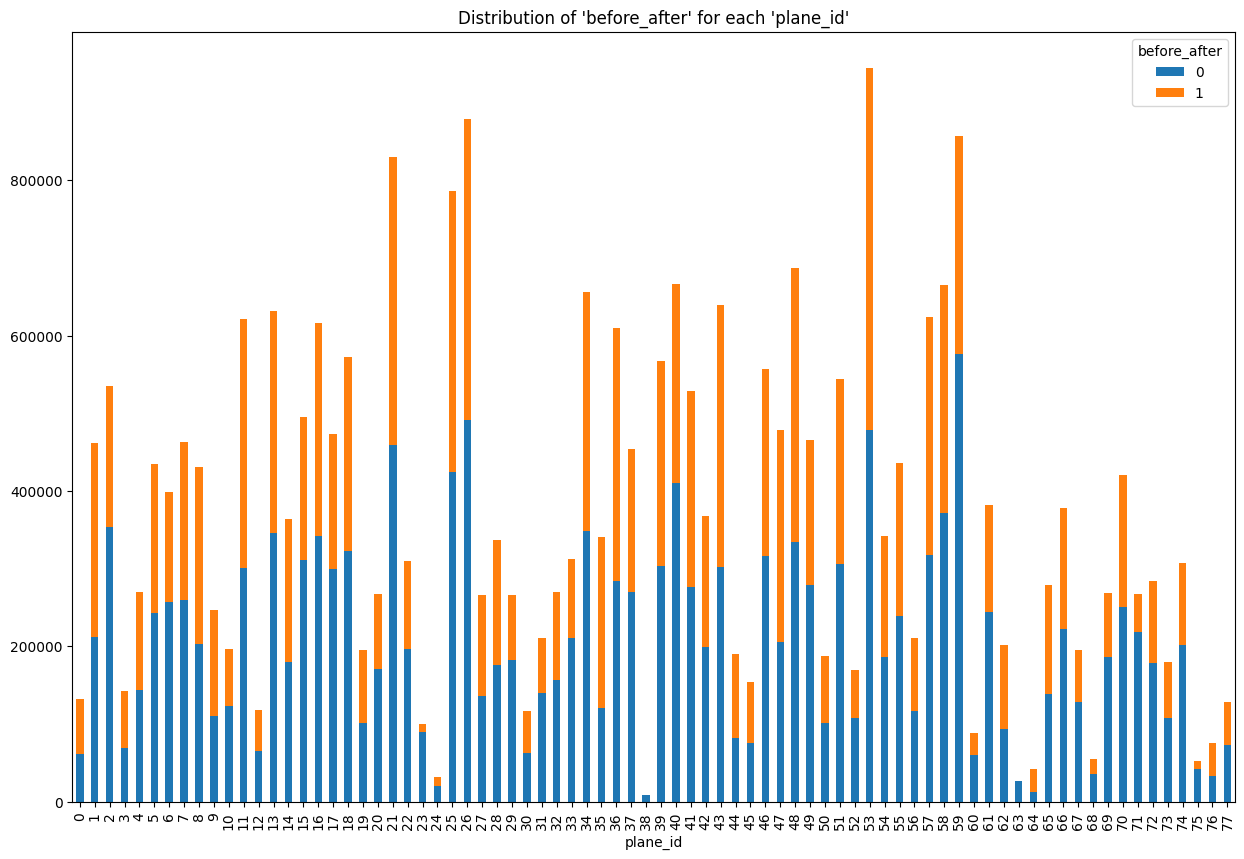

In [20]:
# check the distribution of the 'before_after' column for different plane_id's
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
features = pd.read_csv('data/NGAFID_MC_C28.csv')

# Group by 'plane_id' and 'before_after' columns
grouped = features.groupby(['plane_id', 'before_after']).size().unstack()

# Plot the distribution of 'before_after' for top 10 plane_id's
grouped.plot(kind='bar', stacked=True, figsize=(15, 10))
plt.title("Distribution of 'before_after' for each 'plane_id'")
plt.show()






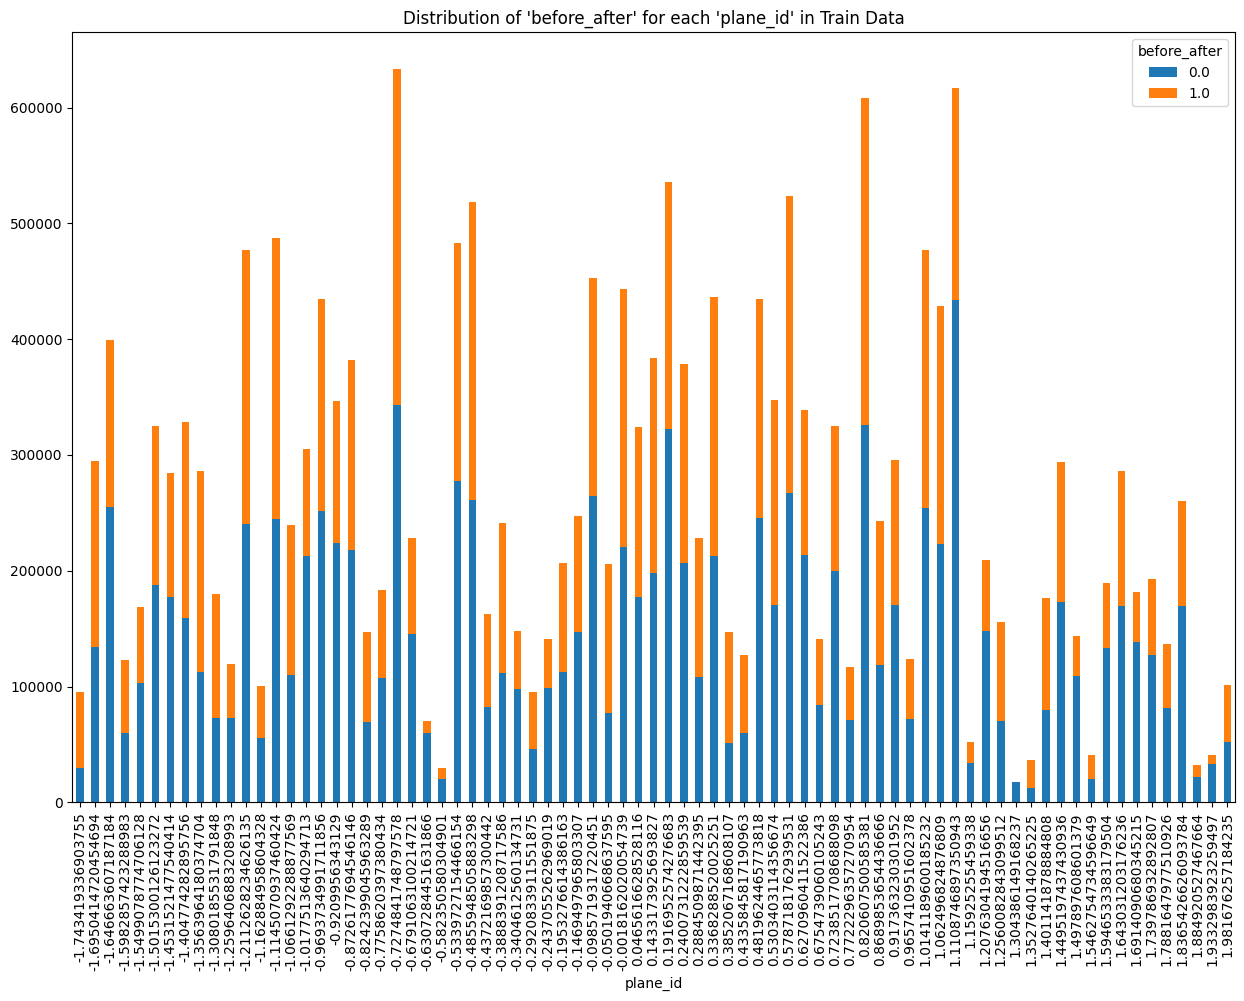

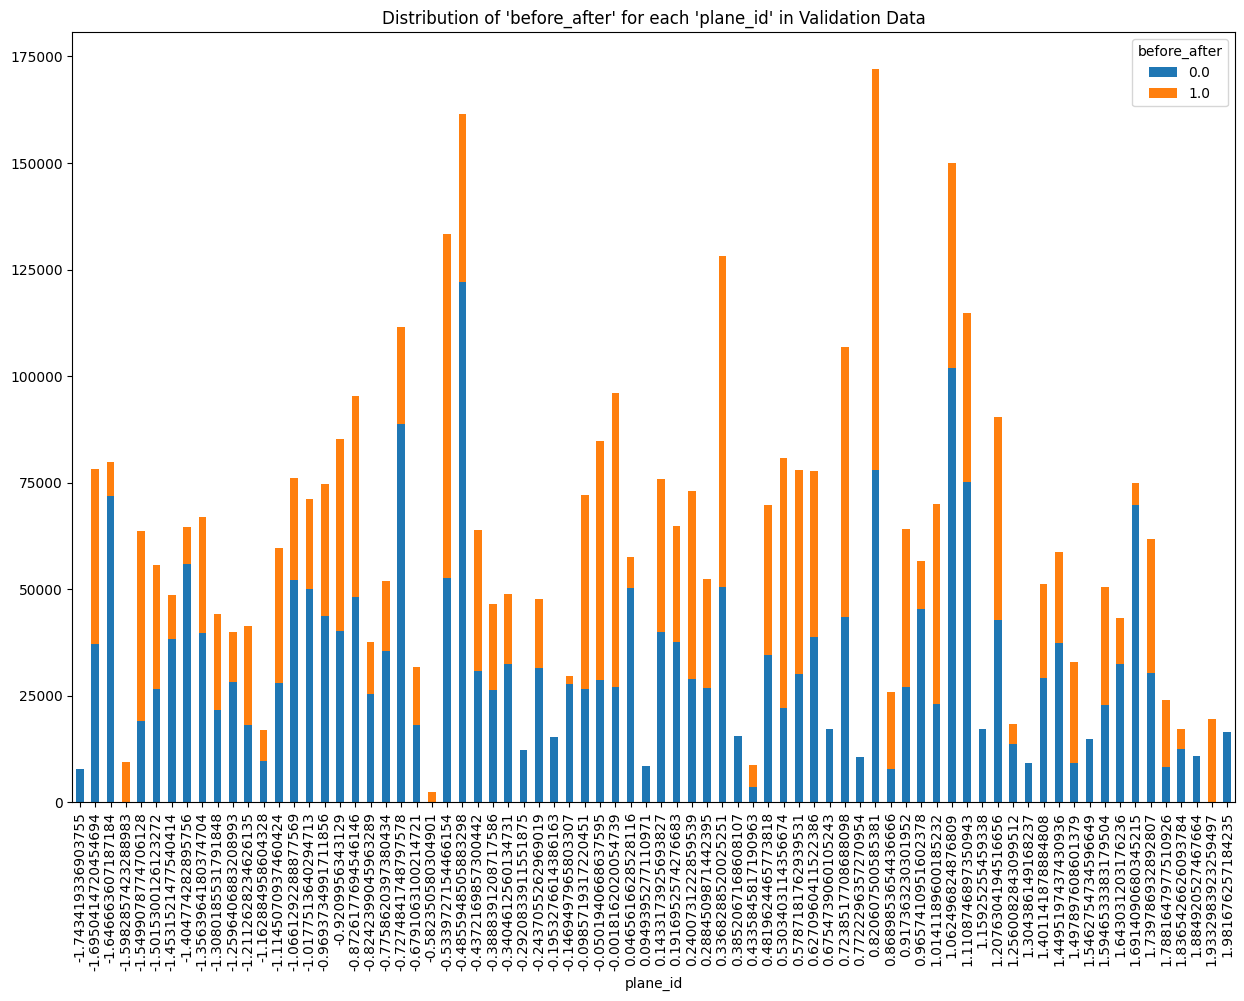

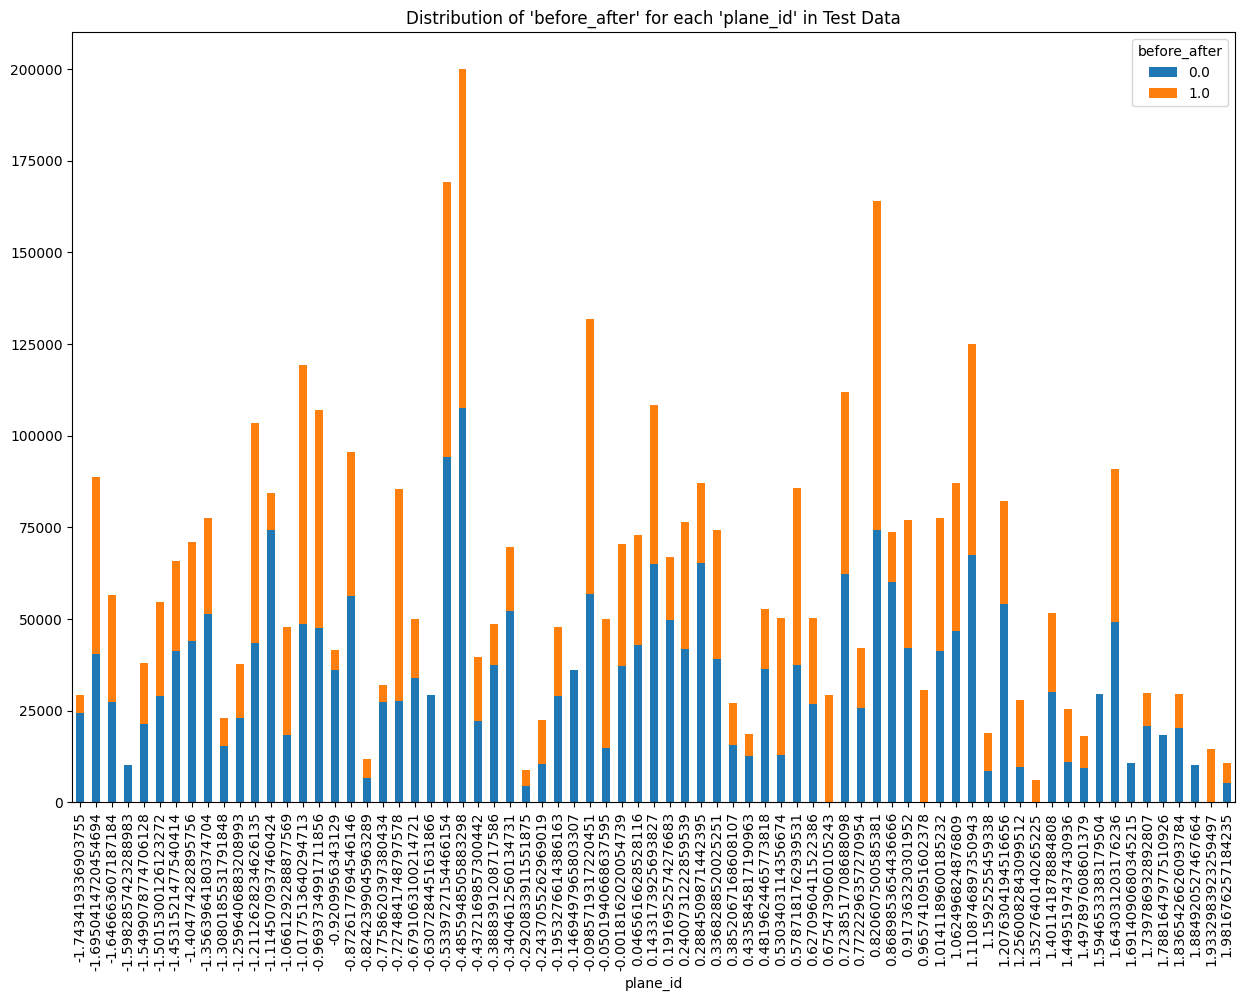

In [21]:
# Analyse the grouped distribution of 'before_after' for each 'plane_id' for train, val and test data without stratification
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
train_data = pd.read_csv('data/NGAFID_train_data.csv')
val_data = pd.read_csv('data/NGAFID_val_data.csv')
test_data = pd.read_csv('data/NGAFID_test_data.csv')


# Group by 'plane_id' and 'before_after' columns
grouped_train = train_data.groupby(['plane_id', 'before_after']).size().unstack()
grouped_val = val_data.groupby(['plane_id', 'before_after']).size().unstack()
grouped_test = test_data.groupby(['plane_id', 'before_after']).size().unstack()

# Plot the distribution of 'before_after' for top 10 plane_id's
grouped_train.plot(kind='bar', stacked=True, figsize=(15, 10))
plt.title("Distribution of 'before_after' for each 'plane_id' in Train Data")
plt.show()

grouped_val.plot(kind='bar', stacked=True, figsize=(15, 10))
plt.title("Distribution of 'before_after' for each 'plane_id' in Validation Data")
plt.show()

grouped_test.plot(kind='bar', stacked=True, figsize=(15, 10))
plt.title("Distribution of 'before_after' for each 'plane_id' in Test Data")
plt.show()

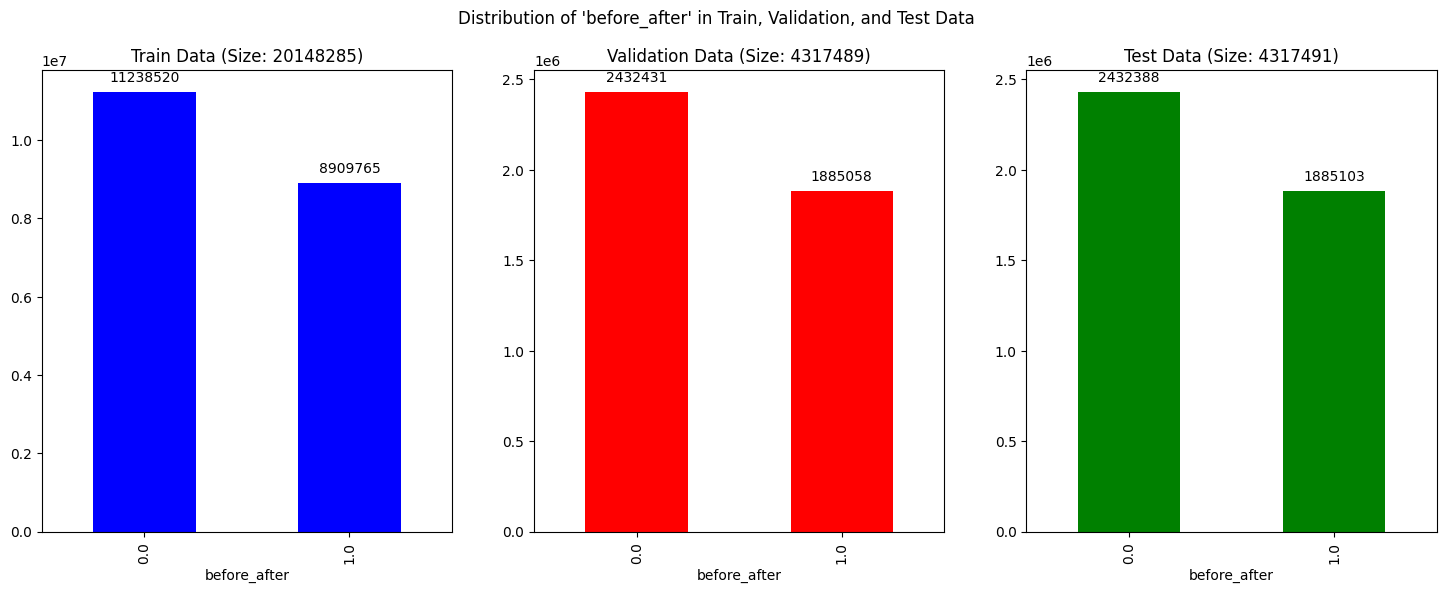

In [25]:
# Analyse the distribution of 'before_after' for train, val and test data without stratification
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
train_data = pd.read_csv('data/NGAFID_train_data.csv')
val_data = pd.read_csv('data/NGAFID_val_data.csv')
test_data = pd.read_csv('data/NGAFID_test_data.csv')

# Plot the distribution of 'before_after' for train, val, and test data
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Function to add counts on top of bars
def add_counts(ax, data):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Train data plot
train_counts = train_data['before_after'].value_counts()
train_counts.plot(kind='bar', ax=axes[0], color='b')
axes[0].set_title(f"Train Data (Size: {len(train_data)})")
add_counts(axes[0], train_counts)

# Validation data plot
val_counts = val_data['before_after'].value_counts()
val_counts.plot(kind='bar', ax=axes[1], color='r')
axes[1].set_title(f"Validation Data (Size: {len(val_data)})")
add_counts(axes[1], val_counts)

# Test data plot
test_counts = test_data['before_after'].value_counts()
test_counts.plot(kind='bar', ax=axes[2], color='g')
axes[2].set_title(f"Test Data (Size: {len(test_data)})")
add_counts(axes[2], test_counts)

plt.suptitle("Distribution of 'before_after' in Train, Validation, and Test Data")
plt.show()





In [24]:
#verify that value_counts of before_after column in train, val and test data add up to the total number of rows in the respective datasets
import pandas as pd


# Get the total number of rows in each dataset
train_rows = len(train_data)
val_rows = len(val_data)
test_rows = len(test_data)


# Get the value counts of 'before_after' column in each dataset
train_counts = train_data['before_after'].value_counts().sum()
val_counts = val_data['before_after'].value_counts().sum()
test_counts = test_data['before_after'].value_counts().sum()

# Print the results
print("Total number of rows in Train Data:", train_rows)
print("Total number of rows in Validation Data:", val_rows)
print("Total number of rows in Test Data:", test_rows)

print("Total value counts in Train Data:", train_counts)
print("Total value counts in Validation Data:", val_counts)
print("Total value counts in Test Data:", test_counts)


Total number of rows in Train Data: 20148285
Total number of rows in Validation Data: 4317489
Total number of rows in Test Data: 4317491
Total value counts in Train Data: 20148285
Total value counts in Validation Data: 4317489
Total value counts in Test Data: 4317491


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split



#load X_train_features

X_train_features = pd.read_csv('data/rocket_features/X_train_features_rocket_1000.csv')
#print shape of X_train_features
print(X_train_features.shape)


#split the data into a train and validation set
X_train, X_val = train_test_split(X_train_features, test_size=0.2, random_state=42)
print("Shape of the training set: ", X_train.shape)
print(X_train.shape)
print("Shape of the validation set: ", X_val.shape)
print(X_val.shape)


# make the features and labels by dropping the last column
X_train_features = X_train.iloc[:, :-1].values
y_train = X_train.iloc[:, -1].values
X_val_features = X_val.iloc[:, :-1].values
y_val = X_val.iloc[:, -1].values

(49393, 2001)
Shape of the training set:  (39514, 2001)
(39514, 2001)
Shape of the validation set:  (9879, 2001)
(9879, 2001)


## ROCKET+OCSVM

In [1]:
#Load the ocsvm fitted model
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from sklearn.svm import OneClassSVM
from utils.mlflow_logger import log_mlflow

# model_path= "mlruns/0/7b307fae68f9446d82375787f4e6ef38/artifacts/model/model.pkl"
# ocsvm = joblib.load(model_path)

#initialize the ocsvm model
ocsvm = OneClassSVM(kernel='rbf', nu=0.01, gamma=0.01)

# fit the ocsvm model
ocsvm.fit(X_train_features)



In [9]:
# print parameters of the ocsvm model
print(ocsvm.get_params())

{'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': -1, 'nu': 0.01, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report 



model_name = "OCSVM"
experiment_name = f"{model_name} Experiments"
num_kernels = 1000
registered_model_name= f"{model_name}_model_{num_kernels}"

log_mlflow(experiment_name, registered_model_name, ocsvm, X_train_features, y_train, X_val_features, y_val)







    

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from utils.mlflow_logger import log_mlflow_run
from sklearn.ensemble import IsolationForest



# # Apply t-SNE to reduce to 2 dimensions
# tsne = TSNE(n_components=2, random_state=42)
# X_train_tsne = tsne.fit_transform(X_train)
#  # store the results in a DataFrame and save it to a CSV file
# X_train_tsne_df = pd.DataFrame(X_train_tsne, columns=['tsne1', 'tsne2'])
# X_train_tsne_df.to_csv('data/rocket_features/tsne/X_train_tsne_rocket_1000.csv', index=False)




# # Create a scatter plot
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], hue=y_train, palette='viridis')
# plt.title('t-SNE of ROCKET Features')
# plt.xlabel('t-SNE Component 1')
# plt.ylabel('t-SNE Component 2')
# plt.show()

# #do a train test split on the tsne data
# X_train_tsne, X_val_tsne = train_test_split(X_train_tsne_df, test_size=0.2, random_state=42)
# print("Shape of the training set: ", X_train_tsne.shape)
# print(X_train_tsne.shape)
# print("Shape of the validation set: ", X_val_tsne.shape)
# print(X_val_tsne.shape)

# # classify with isolation forest

# model = IsolationForest(contamination=0.01, random_state=42)
# model_name = "tsne"
# experiment_name = f"{model_name} Experiments"
# num_kernels = 1000
# registered_model_name= f"{model_name}_model_{num_kernels}_tsne"



 # set up mlflow to use the tsne features and isolation forest model and make predictions

log_mlflow_run(model, X_train_tsne, X_val_tsne, y_train, y_val, experiment_name, registered_model_name=None, num_kernels=1000, feature_extractor= tsne)



MlflowException: API request to http://127.0.0.1:8080/api/2.0/mlflow/experiments/get-by-name failed with exception HTTPConnectionPool(host='127.0.0.1', port=8080): Max retries exceeded with url: /api/2.0/mlflow/experiments/get-by-name?experiment_name=tsne+Experiments (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x118019100>: Failed to establish a new connection: [Errno 61] Connection refused'))

In [ ]:
from utils.mlflow_logger import log_mlflow_run
from sklearn.ensemble import IsolationForest



model = IsolationForest(contamination=0.01, random_state=42)
model_name = "tsne"
experiment_name = f"{model_name} Experiments"
num_kernels = 1000
registered_model_name= f"{model_name}_model_{num_kernels}_tsne"
 # set up mlflow to use the tsne features and isolation forest model and make predictions

log_mlflow_run(model, X_train_tsne, X_val_tsne, y_train, y_val, experiment_name, registered_model_name=None, num_kernels=1000)



## ROCKET+Isolation Forest

In [17]:
# Apply isolation forest to the rocket features
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from utils.mlflow_logger import log_mlflow_run

# Initialize the Isolation Forest model
isolation_forest = IsolationForest(contamination=0.01, random_state=42)

# Fit the Isolation Forest model
isolation_forest.fit(X_train_features)



















IsolationForest(contamination=0.01, random_state=42)

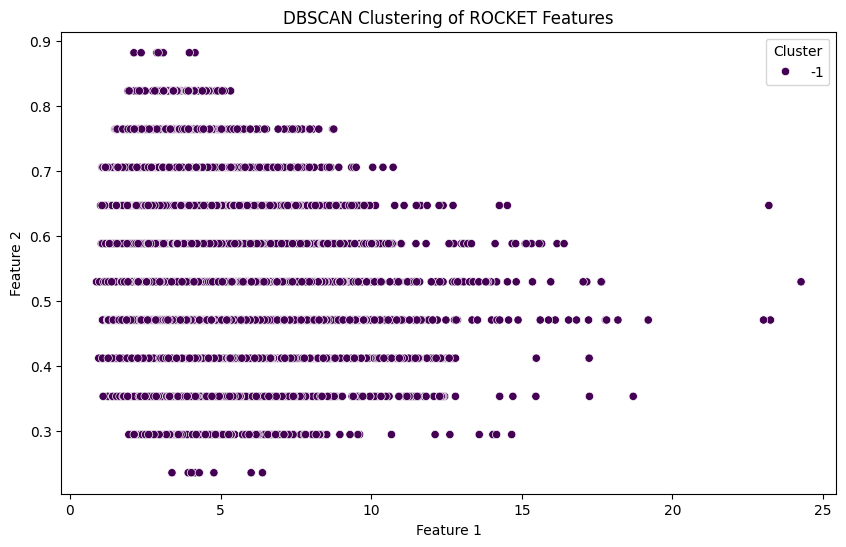

In [12]:
# apply dbscan to the rocket features
from sklearn.cluster import DBSCAN
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


# Initialize the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the DBSCAN model
dbscan.fit(X_train_features)

# Predict the cluster labels
cluster_labels = dbscan.labels_

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_features[:, 0], y=X_train_features[:, 1], hue=cluster_labels, palette='viridis')

plt.title("DBSCAN Clustering of ROCKET Features")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="Cluster")